In [1]:
import tensorflow as tf
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset_dir = 'chest_xray'

train_normal = len(os.listdir(os.path.join(dataset_dir, 'train', 'NORMAL')))
train_pneumonia = len(os.listdir(os.path.join(dataset_dir, 'train', 'PNEUMONIA')))
val_normal = len(os.listdir(os.path.join(dataset_dir, 'val', 'NORMAL')))
val_pneumonia = len(os.listdir(os.path.join(dataset_dir, 'val', 'PNEUMONIA')))
test_normal = len(os.listdir(os.path.join(dataset_dir, 'test', 'NORMAL')))
test_pneumonia = len(os.listdir(os.path.join(dataset_dir, 'test', 'PNEUMONIA')))

print(f'Number of normal training examples : {train_normal}')
print(f'Number of pneumonia training examples : {train_pneumonia}')
print(f'Number of normal validation examples : {val_normal}')
print(f'Number of pneumonia validation examples : {val_pneumonia}')
print(f'Number of normal testing examples : {test_normal}')
print(f'Number of pneumonia testing examples : {test_pneumonia}')

Number of normal training examples : 1341
Number of pneumonia training examples : 3875
Number of normal validation examples : 8
Number of pneumonia validation examples : 8
Number of normal testing examples : 234
Number of pneumonia testing examples : 390


In [3]:
img_size = 200
batch_size_train = 16
batch_size_val = 16
epochs = 20

train_steps_per_epoch = (len(os.listdir(os.path.join('chest_xray', 'train', 'NORMAL')))
                         +len(os.listdir(os.path.join('chest_xray', 'train', 'PNEUMONIA'))))//batch_size_train
valid_steps_per_epoch = (len(os.listdir(os.path.join('chest_xray', 'val', 'NORMAL')))
                        +len(os.listdir(os.path.join('chest_xray', 'val', 'PNEUMONIA'))))//batch_size_val

In [4]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                                rotation_range = 30,
                                                                zoom_range = 0.2,
                                                                width_shift_range=0.1,  
                                                                height_shift_range=0.1)

valid_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

train_generator = train_data_gen.flow_from_directory(os.path.join('chest_xray', 'train'), batch_size=batch_size_train, 
                                                     target_size=(img_size,img_size), shuffle=True, class_mode='binary')

valid_generator = valid_data_gen.flow_from_directory(os.path.join('chest_xray', 'val'), batch_size=batch_size_val,
                                              target_size=(img_size,img_size), shuffle=True, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


    
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=epochs,
        validation_data=valid_generator, validation_steps=valid_steps_per_epoch)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 326 steps, validate for 1 steps
Epoch 1/20
326/326 [==============================] - 108s 333ms/step - loss: 0.5884 - accuracy: 0.7410 - val_loss: 0.8147 - val_accuracy: 0.5000
Epoch 2/20
326/326 [==============================] - 142s 434ms/step - loss: 0.5429 - accuracy: 0.7444 - val_loss: 0.6106 - val_accuracy: 0.6250
Epoch 3/20
326/326 [==============================] - 142s 435ms/step - loss: 0.4643 - accuracy: 0.7772 - val_loss: 0.6205 - val_accuracy: 0.7500
Epoch 4/20
326/326 [==============================] - 148s 455ms/step - loss: 0.4400 - accuracy: 0.7851 - val_loss: 0.5970 - val_accuracy: 0.7500
Epoch 5/20
326/326 [==============================] - 144s 442ms/step - loss: 0.4442 - accuracy: 0.7933 - val_loss: 0.5509 - val_accuracy: 0.8125
Epoch 6/20
326/326 [==============================] - 144s 443ms/step - loss: 0.4079 - accuracy: 0.8037 - val_loss: 0.4879 - val_accuracy: 0.6875
Epoch 7/20
326/326 [============

<Figure size 432x288 with 0 Axes>

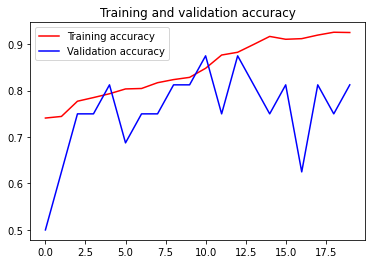

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [8]:
batch_size_test = 32
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_generator = test_data_gen.flow_from_directory(os.path.join('chest_xray', 'test'), batch_size=batch_size_test,
                                              target_size=(img_size,img_size), shuffle=True, class_mode='binary')

test_steps = (len(os.listdir(os.path.join('chest_xray', 'test', 'NORMAL')))
                        +len(os.listdir(os.path.join('chest_xray', 'test', 'PNEUMONIA'))))//batch_size_test

Found 624 images belonging to 2 classes.


In [9]:
results = model.evaluate_generator(test_generator, test_steps+1)
print(f'Test Loss is: {results[0]}')
print(f'Test Accuracy is : {results[1]}')

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
Test Loss is: 0.20766749903559684
Test Accuracy is : 0.932692289352417


In [10]:
model.save('pneumonia-detection.h5')